In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
import json
import seaborn as sns

file = open('./input/data.json', 'r', encoding='utf-8')
data = json.load(file)

mpl.rcParams['font.family'] = 'Malgun Gothic'  # or 'MalgunGothic'
mpl.rcParams['axes.unicode_minus'] = False     # so minus signs render

In [2]:
q_key_value = {
    "ÏÇ¨ÎûåÍ≥º ÏûàÏùÑ Îïå Í∏¥Ïû•ÏùÑ ÎßéÏù¥ ÌïúÎã§.": "ÏÇ¨ÌöåÏ†Å Í∏¥Ïû•",
    "Ïù¥Ïú† ÏóÜÏù¥ Í∞êÏ†ïÍ∏∞Î≥µÏù¥ Ïã¨ÌïòÎã§.": "Í∞êÏ†ï Í∏∞Î≥µ",
    "Ïã¨Í∞ÅÌïòÍ≤å Ï£ÑÏ±ÖÍ∞êÏùÑ ÎäêÎÇÄÎã§.": "Í≥ºÎèÑÌïú Ï£ÑÏ±ÖÍ∞ê",
    "ÏòàÎØºÌïòÍ≥† Ïã†Í≤ΩÏßàÏù¥ ÎÇúÎã§.": "Í≥ºÎØºÏÑ±/ÏßúÏ¶ù",
    "ÏûêÏã†Í∞êÏù¥ Î∂ÄÏ°±ÌïòÎã§.": "ÎÇÆÏùÄ ÏûêÏ°¥Í∞ê",
    "Îß§ÏÇ¨Ïóê ÏùòÏöïÏù¥ ÏóÜÍ≥† ÌîºÍ≥§ÌïòÎã§.": "Î¨¥Í∏∞Î†•/ÌîºÎ°ú",
    "Í¥úÌïú Í±±Ï†ïÏùÑ ÎØ∏Î¶¨ÌïúÎã§.": "ÏòàÍ∏∞ Î∂àÏïà",
    "ÏÇ¨ÏÜåÌïú ÏùºÏóêÎèÑ Î∂àÏïàÌï¥ÏßÄÍ±∞ÎÇò Í≤ÅÏù¥ ÎÇúÎã§.": "Í≥ºÎèÑÌïú Î∂àÏïà",
    "ÏûêÏ£º Ïä¨ÌîÑÍ±∞ÎÇò, Í∏∞Î∂ÑÏù¥ Í∞ÄÎùºÏïâÍ±∞ÎÇò, Ïö∞Ïö∏Ìï¥ÏßÑÎã§.": "Ïö∞Ïö∏ Ï¶ùÏÉÅ",
    "Îä¶Í≤å ÏûêÏÑú ÏïÑÏπ®Ïóê ÏùºÏñ¥ÎÇòÍ∏∞ Ïñ¥Î†µÎã§.": "ÏàòÎ©¥ Î¨∏Ï†ú",
    "ÏÇ¥Í≥† Ïã∂ÏßÄ ÏïäÎã§Îäî ÏÉùÍ∞ÅÏù¥ ÏûêÏ£º Îì†Îã§.": "ÏûêÏÇ¥ ÏÇ¨Í≥†",
    "ÏûêÌï¥Î•º Ìïú Ï†ÅÏù¥ ÏûàÎã§.": "ÏûêÌï¥ ÌñâÎèô",
    "ÏûêÏÇ¥Í≥ÑÌöçÏùÑ Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏÑ∏Ïö¥ Ï†ÅÏù¥ ÏûàÎã§.": "ÏûêÏÇ¥ Í≥ÑÌöç",
    "ÏûêÏÇ¥ÏùÑ Ïã¨Í∞ÅÌïòÍ≤å ÏÉùÍ∞ÅÌïòÍ≥† ÏûàÎã§.": "Ïã¨Í∞ÅÌïú ÏûêÏÇ¥ÏÇ¨Í≥†",
    "ÎÇ¥ ÏÇ∂ÏùÄ Îçî Ïù¥ÏÉÅ Ìù¨ÎßùÏù¥ ÏóÜÎäî Í≤É Í∞ôÎã§.": "Ï†àÎßùÍ∞ê",
    "Ï£ΩÏúºÎ†§Í≥† ÏûêÏÇ¥ÏùÑ ÏãúÎèÑÌïú Ï†ÅÏù¥ ÏûàÎã§.": "ÏûêÏÇ¥ ÏãúÎèÑ",
    "Í±∞ÏßìÎßêÏùÑ ÏûêÏ£º ÌïúÎã§.": "ÎπàÎ≤àÌïú Í±∞ÏßìÎßê",
    "Îã§Î•∏ ÏïÑÏù¥Îì§Í≥º ÏûêÏ£º Îã§Ìà∞Îã§(Ïòà: ÎßêÏã∏ÏõÄ ÌòπÏùÄ Ï£ºÎ®π Îã§Ìàº).": "ÎòêÎûò Í∞àÎì±",
    "Ïñ¥Î•∏(Î∂ÄÎ™®, ÍµêÏÇ¨ Îì±)ÏóêÍ≤å Î∞òÌï≠Ï†ÅÏù¥Í±∞ÎÇò ÎåÄÎì†Îã§.": "Î∞òÌï≠ ÌñâÎèô",
    "Îã§Î•∏ ÏïÑÏù¥Î•º ÎÜÄÎ¶¨Í±∞ÎÇò Í¥¥Î°≠Ìûå Ï†Å(Ïñ∏Ïñ¥Ìè≠Î†•, ÏÇ¨Ïù¥Î≤ÑÌè≠Î†•, Ïã†Ï≤¥Ï†ÅÌè≠Î†• Îì±)Ïù¥ ÏûàÎã§.": "Í¥¥Î°≠Ìûò Í∞ÄÌï¥",
    "Ïù¥Ï†ÑÏóê Í≤™ÏóàÎçò ÌûòÎì† ÏùºÎì§(ÏÇ¨Í±¥¬∑ÏÇ¨Í≥†, Í∞ÄÍπåÏö¥ ÏÇ¨ÎûåÍ≥ºÏùò Ïù¥Î≥Ñ ÎòêÎäî ÏÇ¨Îßù Îì±)Ïù¥ ÏßÄÍ∏àÎèÑ Í≥ÑÏÜç ÏÉùÍ∞ÅÎÇòÏÑú ÌûòÎì§Îã§.": "Ïô∏ÏÉÅ Ïπ®ÏäµÏ¶ùÏÉÅ",
    "ÌûòÎì† ÏùºÎì§(ÏÇ¨Í±¥¬∑ÏÇ¨Í≥†, Í∞ÄÍπåÏö¥ ÏÇ¨ÎûåÍ≥ºÏùò Ïù¥Î≥Ñ ÎòêÎäî ÏÇ¨Îßù Îì±)ÏùÑ Í≤™ÏùÄ ÌõÑ ÏïÖÎ™ΩÏùÑ ÏûêÏ£º ÍæºÎã§.": "Ïô∏ÏÉÅ Í¥ÄÎ†® ÏïÖÎ™Ω",
    "ÌûòÎì† ÏùºÎì§(ÏÇ¨Í±¥¬∑ÏÇ¨Í≥†, Í∞ÄÍπåÏö¥ ÏÇ¨ÎûåÍ≥ºÏùò Ïù¥Î≥Ñ ÎòêÎäî ÏÇ¨Îßù Îì±)ÏùÑ Í≤™ÏùÄ ÌõÑ Îã§Î•∏ ÏÇ¨ÎûåÏùÑ ÎØøÍ∏∞ Ïñ¥Î†§Ïõå ÌòºÏûê ÏßÄÎÇ∏Îã§.": "Ïô∏ÏÉÅ ÌõÑ Í≥†Î¶Ω",
    "ÌûòÎì† ÏùºÎì§(ÏÇ¨Í±¥¬∑ÏÇ¨Í≥†, Í∞ÄÍπåÏö¥ ÏÇ¨ÎûåÍ≥ºÏùò Ïù¥Î≥Ñ ÎòêÎäî ÏÇ¨Îßù Îì±)ÏùÑ Í≤™ÏùÄ ÌõÑ ÏßÄÎÇòÏπòÍ≤å ÏïàÏ†ÑÏùÑ ÌôïÏù∏ÌïúÎã§.": "Ïô∏ÏÉÅ ÌõÑ Í≥ºÍ∞ÅÏÑ±",
    "ÌûòÎì† ÏùºÎì§(ÏÇ¨Í±¥¬∑ÏÇ¨Í≥†, Í∞ÄÍπåÏö¥ ÏÇ¨ÎûåÍ≥ºÏùò Ïù¥Î≥Ñ ÎòêÎäî ÏÇ¨Îßù Îì±)Ïù¥ ÏÉùÍ∞ÅÎÇòÎäî ÏÉÅÌô©ÏùÑ ÌîºÌïúÎã§.": "Ïô∏ÏÉÅ ÌöåÌîºÌñâÎèô",
    "Îã¥Î∞∞Î•º ÏûêÏ£º ÌîºÏö∞Í≥† ÏûàÎã§.": "Ìù°Ïó∞ Î¨∏Ï†ú",
    "Ïà†ÏùÑ ÏûêÏ£º ÎßàÏãúÍ≥† ÏûàÎã§.": "ÏùåÏ£º Î¨∏Ï†ú",
    "Ï†ÅÏùëÎ†•Ïù¥ÎÇò ÎåÄÏ≤ò Îä•Î†•Ïù¥ ÎòêÎûòÏóê ÎπÑÌï¥ Îñ®Ïñ¥ÏßÑÎã§.": "Ï†ÅÏùëÎ†• Ï†ÄÌïò",
    "ÏßëÏóêÏÑú Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûêÎäî Í≤ÉÏù¥ ÎëêÎ†µÎã§(ÏàòÌïôÏó¨Ìñâ, Ï∫†ÌîÑ Îì±)": "Î∂ÑÎ¶¨ Î∂àÏïà",
    "ÏàòÏóÖ ÎÇ¥Ïö©ÏùÑ ÎåÄÎ∂ÄÎ∂Ñ Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†µÎã§.": "ÌïôÏäµ Ïñ¥Î†§ÏõÄ",
    "Îã§Î•∏ ÏÇ¨ÎûåÏùò Î¨ºÍ±¥ÏùÑ Î∂ÄÏàòÍ±∞ÎÇò ÌõîÏπú Ï†ÅÏù¥ ÏûàÎã§.": "Ïû¨ÏÇ∞ Í¥ÄÎ†® ÎπÑÌñâ",
    "Í≤åÏûÑÏóê ÎÑàÎ¨¥ Îπ†ÏßÑ Í≤É Í∞ôÎã§.": "Í≤åÏûÑ Í≥ºÎ™∞ÏûÖ",
    "ÏπúÍµ¨Î•º ÏÇ¨Í∑ÄÍ±∞ÎÇò ÏπúÎ∞ÄÌïú Í¥ÄÍ≥ÑÎ•º Ïú†ÏßÄÌïòÎäî Í≤ÉÏù¥ Ïñ¥Î†µÎã§.": "Í¥ÄÍ≥Ñ ÌòïÏÑ± Í≥§ÎûÄ",
    "ÌïôÍµêÏóê Í∞ÄÎäî Í≤ÉÏù¥ ÎëêÎ†µÎã§.": "Îì±Íµê Í±∞Î∂Ä",
    "Îã§Î•∏ ÏïÑÏù¥Î°úÎ∂ÄÌÑ∞ ÎÜÄÎ¶ºÏù¥ÎÇò Í¥¥Î°≠Ìûô(Ïñ∏Ïñ¥Ìè≠Î†•, ÏÇ¨Ïù¥Î≤ÑÌè≠Î†•, Ïã†Ï≤¥Ï†ÅÌè≠Î†• Îì±)ÏùÑ ÎãπÌïòÏó¨ ÌûòÎì§Îã§.": "Í¥¥Î°≠Ìûò ÌîºÌï¥",
    "Îã§Î•∏ ÏïÑÏù¥Î°úÎ∂ÄÌÑ∞ Îî∞ÎèåÎ¶ºÏù¥ÎÇò Î¨¥ÏãúÎ•º ÎãπÌïòÏó¨ ÌûòÎì§Îã§.": "Îî∞ÎèåÎ¶º ÌîºÌï¥"
}

In [3]:
question_records = []
id_map = {} 
counter = 1  

for stat_id, stat_data in data["statistics"].items():
    if stat_id not in id_map:
        if counter < 10:
            id_map[stat_id] = f"ÌïôÏÉù0{counter} "
        else:   
            id_map[stat_id] = f"ÌïôÏÉù{counter} "
        counter += 1
    short_id = id_map[stat_id]

    gender = stat_data["gender"]
    grade = stat_data["grade"]
    total_score = stat_data["totalScore"]
    questions = stat_data.get("question", [])

    for q in questions:
        if q:
            question_records.append({
                "student_id": short_id,        # üîπ use the short ID here
                "Original_ID": stat_id,        # optional: keep the original
                "Gender": gender,
                "Grade": grade,
                "Question": q_key_value.get(q["question"], q["question"]),
                "Answer": q["answer"],
                "Type": q["type"],
                "TotalScore": total_score
            })


question_records.sort(key=lambda x: x["student_id"])
question_df = pd.DataFrame(question_records)
question_df.to_csv('./output/question_data.csv', index=False)

print("ID mapping:", id_map)

OSError: Cannot save file into a non-existent directory: 'output'

In [ ]:
combined_rows = []

for stat_id, stat_data in data["statistics"].items():
    for stu_id, stu_data in data["students"].items():
        if (stat_data["grade"] == stu_data["studentGrade"] and
            stat_data["totalScore"] == stu_data["totalScore"] and
                stat_data["scores"] == stu_data["scores"]):

            row = {
                "ID_stat": stat_id,
                "ID_student": stu_id,
                "Gender": stat_data.get("gender"),
                "Grade": stat_data.get("grade"),
                "SurveyTime": stat_data.get("date"),
                "ParsedTime": stu_data.get("parsedDate"),
                "TotalScore": stat_data.get("totalScore")
            }
            
            row.update(stat_data["scores"])
            combined_rows.append(row)
            break

df_combined = pd.DataFrame(combined_rows)
print(df_combined.head(10))

                ID_stat            ID_student Gender Grade SurveyTime  \
0  -ORO3afgAtqlPL9nX2G5  -ORO3afb_TN98Kofxvo2   girl   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
1  -ORO42E6AZfcaferUZKV  -ORO42E2e1pii41jNKbl   girl   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
2  -ORO47TnvMiiv0gHk-3i  -ORO47TjdZ_5jV43PcXi    boy   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
3  -ORO4eKQsY3AF-Cji_Rk  -ORO4eKMBcwY5NWfbf_9   girl   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
4  -ORO5pZyLjX3rRv7QpeL  -ORO5pZuPnJomqtF8JFn    boy   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
5  -ORO5zoeU-yf5-uvZosn  -ORO5zobt7VtPF24uHBx    boy   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
6  -ORO6ER83vDmV-5Heo2q  -ORO6ER5Zg2LQxuQFguv   girl   2ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
7  -ORO6JStF3Y4GNCHJoLx  -ORO6JSmibg774hAc5yk   girl   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
8  -ORO6V3mVn-dohMfgfb7  -ORO6V3ezlhvf3gdloU5    boy   1ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   
9  -ORO6cFZ9Es7CrenvoVv  -ORO6cFVqdeiSXqBLPHR   girl   3ÌïôÎÖÑ  5Ïõî 29Ïùº 7Ïãú   

          ParsedTime  TotalScore  Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú  Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú  Ïô∏ÌòÑÌôî Î¨∏Ï†

In [ ]:
pivot_df = question_df.pivot(
    index="student_id", columns="Question", values="Answer")

likert_counts = question_df.groupby("Question")["Answer"].value_counts(
    normalize=True).unstack(fill_value=0)

high_score_sum = likert_counts[[col for col in [
    3, 2, 1] if col in likert_counts.columns]].sum(axis=1)
likert_counts = likert_counts.loc[high_score_sum.sort_values(
    ascending=True).index]

likert_counts.plot(kind="barh", stacked=True,
                   colormap="coolwarm", figsize=(10, 12))
plt.title("ÏßàÎ¨∏ Î≥Ñ ÎãµÎ≥Ä ÎπÑÏú® (ÎÜíÏùÄ Ï†êÏàò ÎπÑÏú® Ïàú)")
plt.xlabel("ÎãµÎ≥Ä ÎπÑÏú®")
plt.ylabel("ÏßàÎ¨∏")
plt.legend(title="ÎãµÎ≥Ä", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

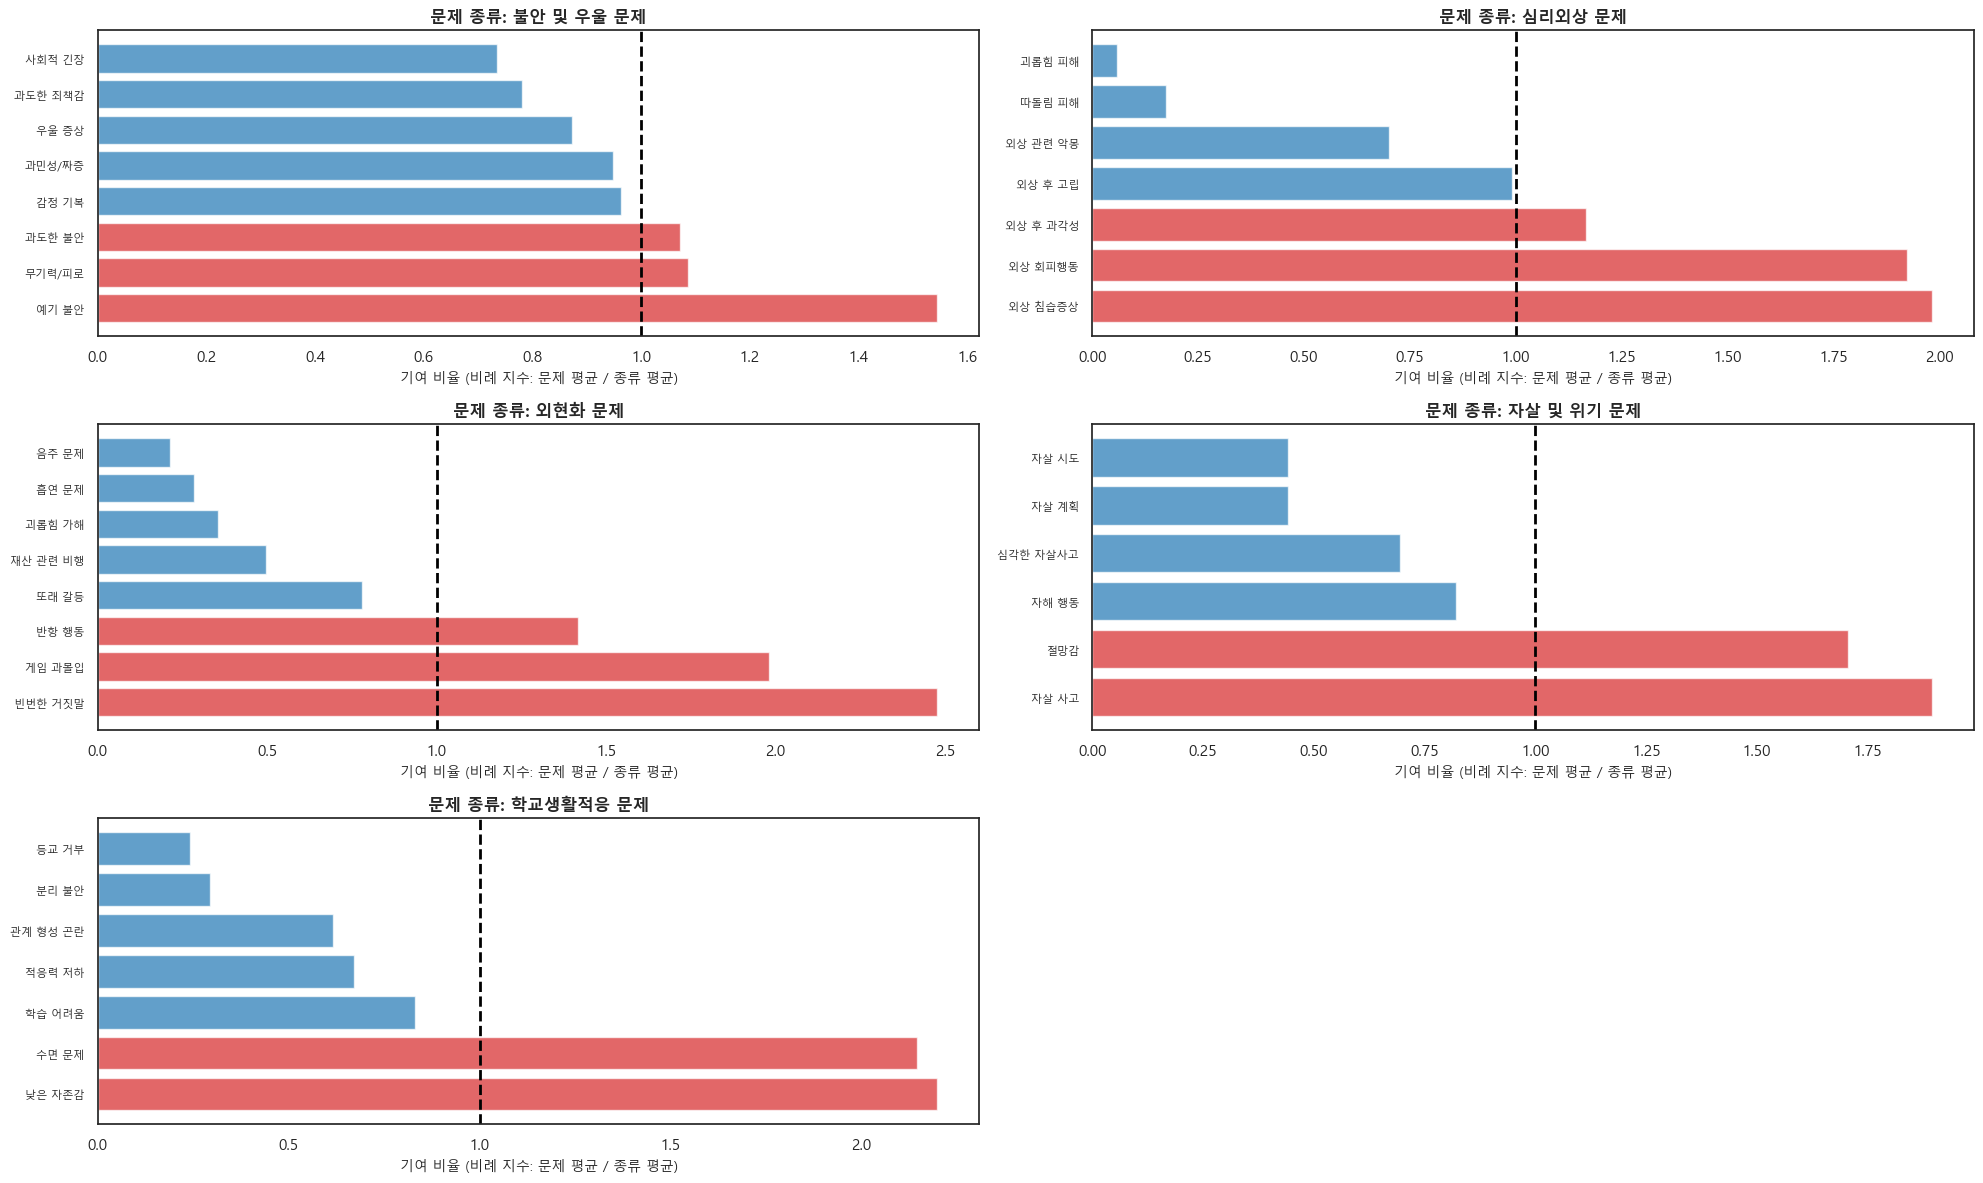

In [ ]:
import pandas as pd

# Step 1: Compute mean score per question
question_avg = question_df.groupby(['Type', 'Question'])[
    'Answer'].mean().reset_index(name='QuestionAvg')

# Step 2: Compute mean score per domain (Type)
domain_avg = question_df.groupby(
    'Type')['Answer'].mean().reset_index(name='DomainAvg')

# Step 3: Merge and compute contribution ratio
contrib_df = pd.merge(question_avg, domain_avg, on='Type')
contrib_df['ContributionRatio'] = contrib_df['QuestionAvg'] / \
    contrib_df['DomainAvg']

# Step 4: Sort
contrib_df = contrib_df.sort_values(
    ['Type', 'ContributionRatio'], ascending=[True, False])

types = contrib_df['Type'].unique()
n_types = len(types)

n_rows = int(np.ceil(n_types / 2))

fig, axes = plt.subplots(nrows=n_rows,
                         ncols=2,
                         figsize=(20, 4 * n_rows))

axes = axes.flatten() if n_types > 1 else [axes]

for idx, type_name in enumerate(types):
    ax = axes[idx]
    type_data = contrib_df[contrib_df['Type'] == type_name].sort_values(
        'ContributionRatio', ascending=False)

    colors = ['#d62728' if x >
              1 else '#1f77b4' for x in type_data['ContributionRatio']]

    ax.barh(type_data['Question'],
            type_data['ContributionRatio'], color=colors, alpha=0.7)
    ax.axvline(x=1, color='black', linestyle='--', linewidth=2)
    ax.set_xlabel('Í∏∞Ïó¨ ÎπÑÏú® (ÎπÑÎ°Ä ÏßÄÏàò: Î¨∏Ï†ú ÌèâÍ∑† / Ï¢ÖÎ•ò ÌèâÍ∑†)', fontsize=10)
    ax.set_title(f'Î¨∏Ï†ú Ï¢ÖÎ•ò: {type_name}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=8)

# Hide empty subplots if odd number of types
for idx in range(n_types, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

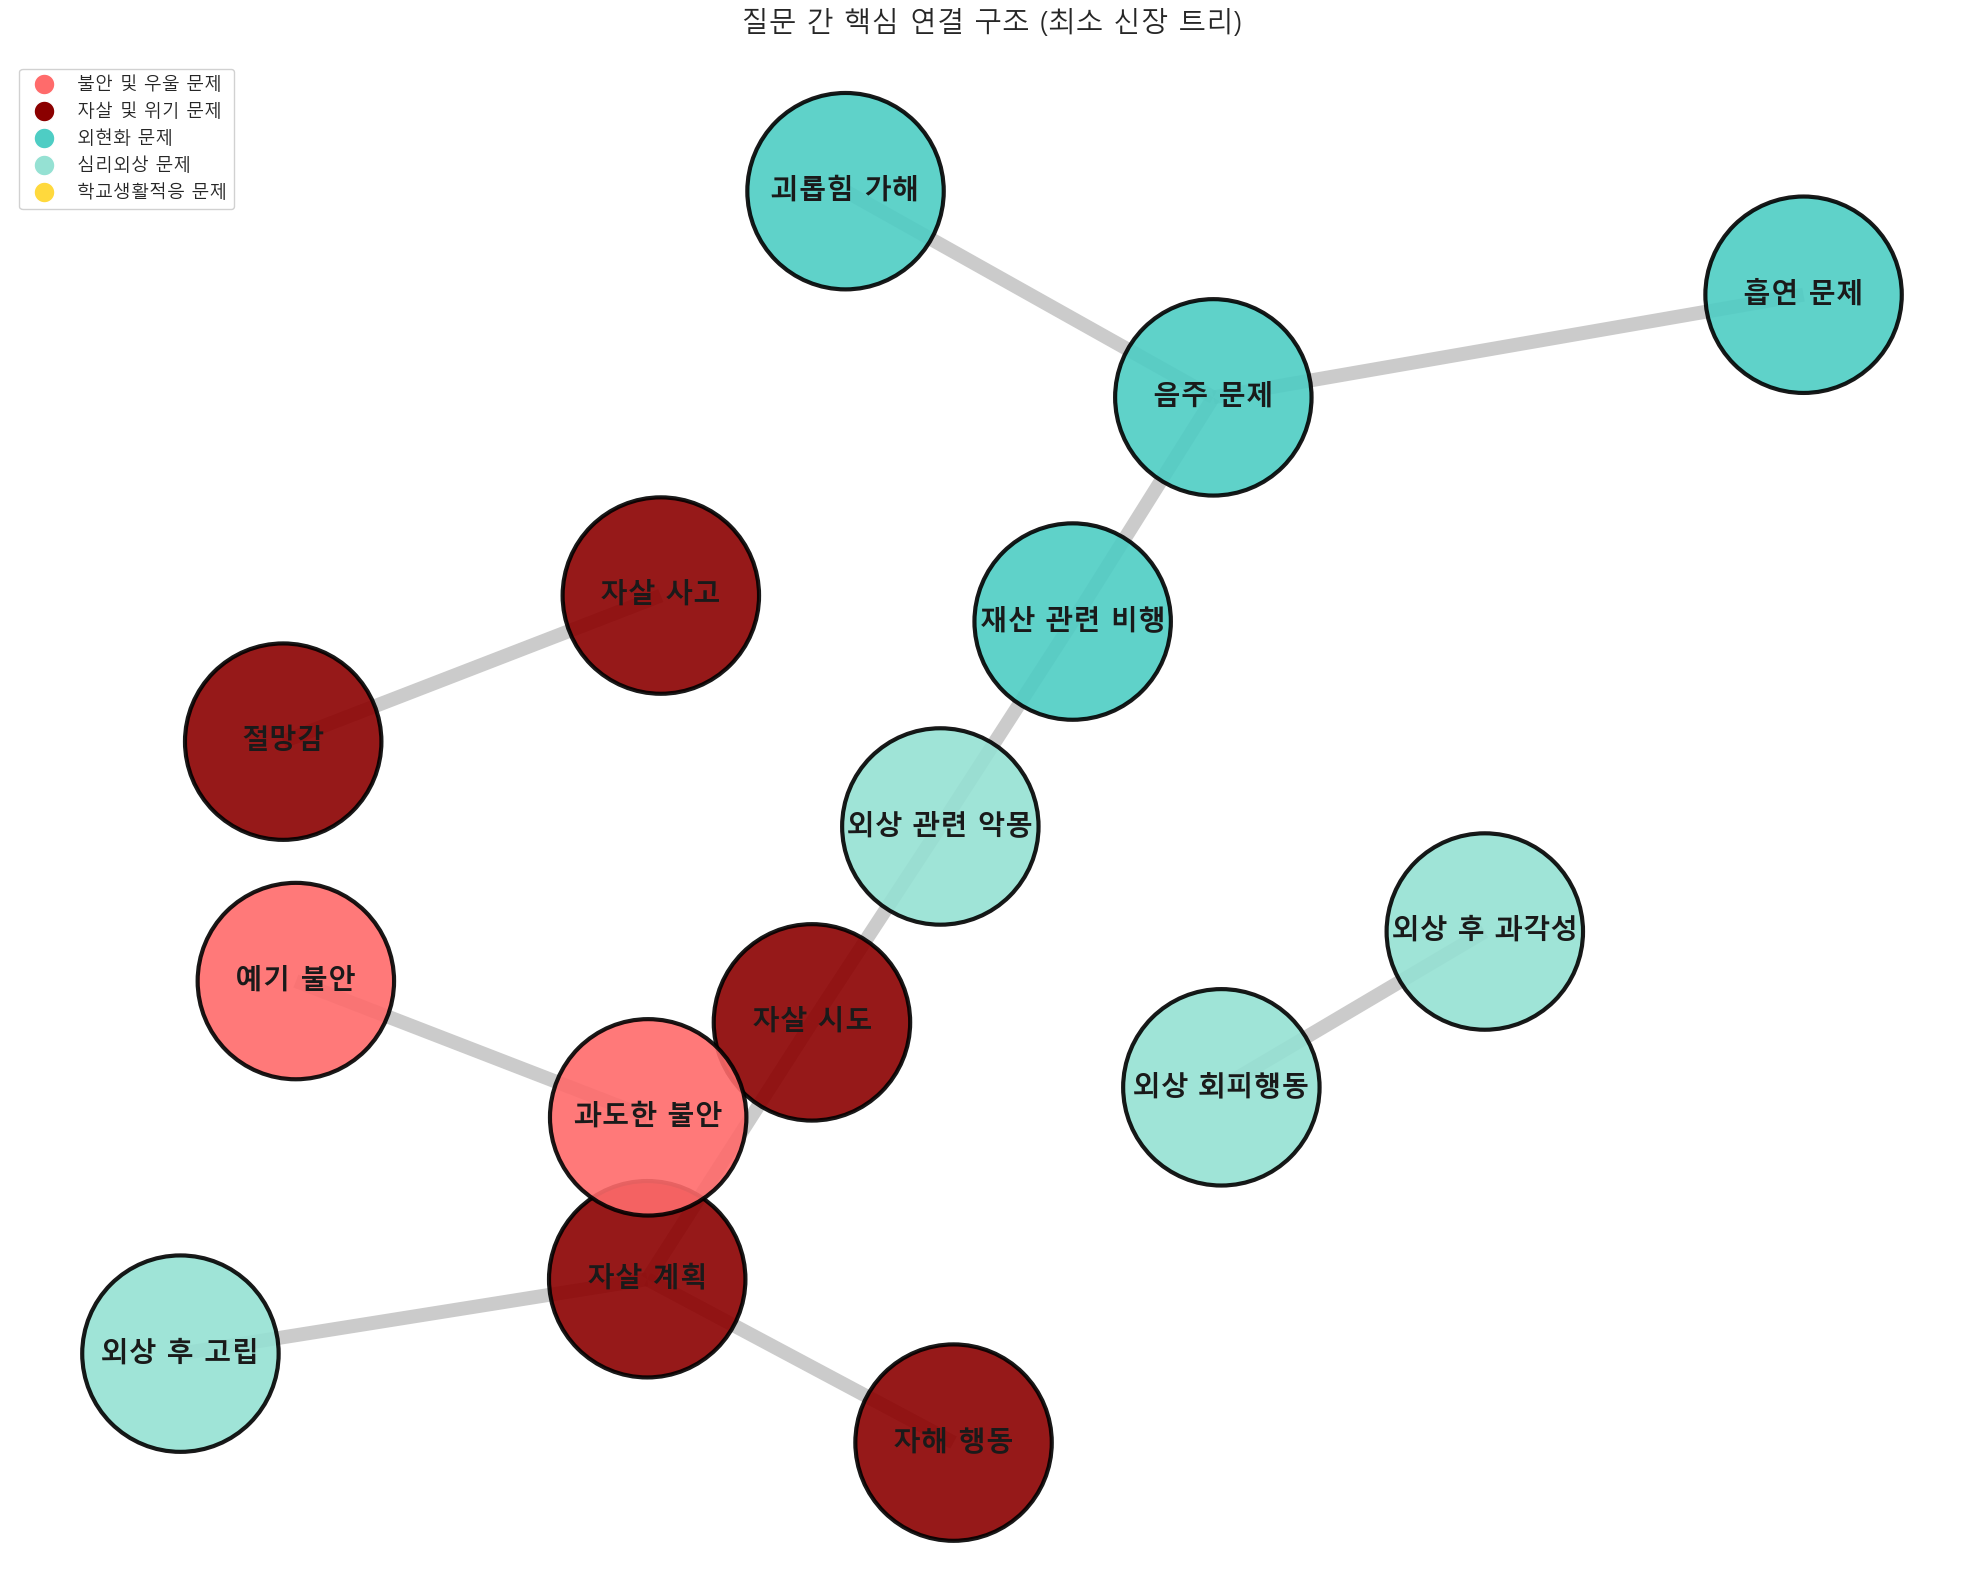


=== ÏµúÏÜå Ïã†Ïû• Ìä∏Î¶¨: 15Í∞ú ÎÖ∏Îìú, 11Í∞ú Ïó£ÏßÄ ===


In [ ]:
# Î∞©Î≤ï 2: Minimum Spanning Tree (ÏµúÏÜå Ïã†Ïû• Ìä∏Î¶¨)
# Î™®Îì† ÎÖ∏ÎìúÎ•º Ïó∞Í≤∞ÌïòÎêò Í∞ÄÏû• Ï§ëÏöîÌïú Ïó∞Í≤∞Îßå Ïú†ÏßÄ

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# ÏÉÅÏúÑ 30Í∞úÏùò Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå ÏÑ†ÌÉù

corr_matrix = pivot_df.corr()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # ÏûêÍ∏∞ ÏÉÅÍ¥Ä Ï†úÍ±∞
top_pairs = corr_pairs.head(30)

G = nx.Graph()

# Top 30 ÏåçÎßå Ïó£ÏßÄÎ°ú Ï∂îÍ∞Ä
for (q1, q2), corr_value in top_pairs.items():
    G.add_edge(q1, q2, weight=corr_value)

# Type Îß§Ìïë Í∞ÄÏ†∏Ïò§Í∏∞
type_mapping = question_df[['Question', 'Type']].drop_duplicates(
).set_index('Question')['Type'].to_dict()

# TypeÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
colors_map = {
    'Î∂àÏïà Î∞è Ïö∞Ïö∏ Î¨∏Ï†ú': '#FF6B6B',
    'ÏûêÏÇ¥ Î∞è ÏúÑÍ∏∞ Î¨∏Ï†ú': '#8B0000',
    'Ïô∏ÌòÑÌôî Î¨∏Ï†ú': '#4ECDC4',
    'Ïã¨Î¶¨Ïô∏ÏÉÅ Î¨∏Ï†ú': '#95E1D3',
    'ÌïôÍµêÏÉùÌôúÏ†ÅÏùë Î¨∏Ï†ú': '#FFD93D'
}

# Î≤îÎ°Ä ÏöîÏÜå ÏÉùÏÑ±
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=color, markersize=15, label=type_name)
                   for type_name, color in colors_map.items()]

# Í∞ÄÏ§ëÏπòÎ•º Î∞òÏ†Ñ (ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Í±∞Î¶¨Í∞Ä Í∞ÄÍπåÏõÄ)
for u, v, data in G.edges(data=True):
    data['distance'] = 1 - data['weight']

# ÏµúÏÜå Ïã†Ïû• Ìä∏Î¶¨ ÏÉùÏÑ±
mst = nx.minimum_spanning_tree(G, weight='distance')

plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(mst)

node_colors = [colors_map.get(type_mapping.get(node, ''), 'lightgray')
               for node in mst.nodes()]

# MSTÎäî Ìä∏Î¶¨ Íµ¨Ï°∞Ïù¥ÎØÄÎ°ú Í≥ÑÏ∏µÏ†ÅÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÏùå
nx.draw_networkx_edges(mst, pos, width=10, alpha=0.6, edge_color='darkgray')
nx.draw_networkx_nodes(mst, pos, node_color=node_colors,
                       node_size=20000, alpha=0.9, edgecolors='black', linewidths=3)
nx.draw_networkx_labels(mst, pos, font_family='Malgun Gothic',
                        font_size=20, font_weight='bold')

plt.legend(handles=legend_elements, loc='upper left', fontsize=13,
           prop={'family': 'Malgun Gothic', 'size': 13}, framealpha=0.9)

plt.title('ÏßàÎ¨∏ Í∞Ñ ÌïµÏã¨ Ïó∞Í≤∞ Íµ¨Ï°∞ (ÏµúÏÜå Ïã†Ïû• Ìä∏Î¶¨)',
          fontsize=20, fontfamily='Malgun Gothic', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print(
    f"\n=== ÏµúÏÜå Ïã†Ïû• Ìä∏Î¶¨: {mst.number_of_nodes()}Í∞ú ÎÖ∏Îìú, {mst.number_of_edges()}Í∞ú Ïó£ÏßÄ ===")